<a href="https://colab.research.google.com/github/das9souvik/Black-Pearl/blob/main/Analytics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Multi-Label Image Classification on Movies Poster using CNN**

We are trying to identify the genre of movies from their posters using Deep Learning methods 

**Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

**Cloning the Datasets from GitHub link**

In [2]:
!git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

fatal: destination path 'Movies-Poster_Dataset' already exists and is not an empty directory.


In [3]:
Metadata=pd.read_csv('/content/Movies-Poster_Dataset/train.csv')

In [5]:
Metadata.shape

(7254, 27)

In [6]:
Metadata.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


**Converting each image to a fixed size of 350×350. The values in the images are between 0 to 255. Neural networks work well with values between 0 to 1. Normalizing the values by dividing all of the values by 255.**

In [7]:
image_height=350
image_width=350
x=[]
for i in tqdm(range(Metadata.shape[0])):
  path = '/content/Movies-Poster_Dataset/Images/' + Metadata['Id'][i] + '.jpg'
  img= image.load_img(path, target_size=(image_height, image_width, 3))
  img=image.img_to_array(img)
  img= img/255.0
  x.append(img)
 
x=np.array(x)

100%|██████████| 7254/7254 [00:33<00:00, 214.61it/s]


**x is a numpy array which has 7254 images. Each image has the size 350×350 and is 3 dimensional as the image is a RGB coloured image.**

In [8]:
x.shape

(7254, 350, 350, 3)

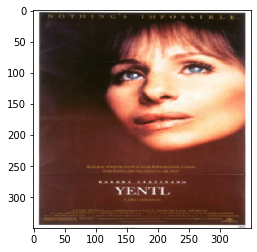

In [9]:
plt.imshow(x[15])

In [10]:
Metadata['Genre'][15]

"['Drama', 'Musical', 'Romance']"

In [11]:
y= Metadata.drop(['Id','Genre'], axis = 1)
y= y.to_numpy()
y.shape

(7254, 25)

 **Spliting the data into training and testing giving a test_size = 0.30 will keep 30% data for testing and 70% data will be used for training the model. Random_state controls the shuffling applied to the data before applying the split.**

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 10, test_size=0.30)

In [13]:
x_train[0].shape

(350, 350, 3)

## **Building a CNN Model**

In [72]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = x_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(25, activation='sigmoid'))

In [73]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization_15 (Batc (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 174, 174, 16)      0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_16 (Batc (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 86, 86, 32)       

## **Compiling and Fitting the Model**

In [74]:
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.BinaryCrossentropy(), metrics=[keras.metrics.BinaryAccuracy()])

In [75]:
GenrePred = model.fit(x_train, y_train, epochs=10, batch_size = 50, validation_data=(x_test, y_test))

Epoch 1/10
102/102 [==============================] - 13s 111ms/step - loss: 0.8962 - binary_accuracy: 0.5294 - val_loss: 0.7666 - val_binary_accuracy: 0.6837
Epoch 2/10
102/102 [==============================] - 11s 110ms/step - loss: 0.5710 - binary_accuracy: 0.7385 - val_loss: 0.3028 - val_binary_accuracy: 0.9059
Epoch 3/10
102/102 [==============================] - 11s 110ms/step - loss: 0.3246 - binary_accuracy: 0.8935 - val_loss: 0.3854 - val_binary_accuracy: 0.9061
Epoch 4/10
102/102 [==============================] - 11s 109ms/step - loss: 0.2732 - binary_accuracy: 0.9042 - val_loss: 0.4003 - val_binary_accuracy: 0.9062
Epoch 5/10
102/102 [==============================] - 11s 110ms/step - loss: 0.2612 - binary_accuracy: 0.9080 - val_loss: 0.3293 - val_binary_accuracy: 0.9059
Epoch 6/10
102/102 [==============================] - 11s 110ms/step - loss: 0.2562 - binary_accuracy: 0.9081 - val_loss: 0.3266 - val_binary_accuracy: 0.9076
Epoch 7/10
102/102 [==========================

# **Visualizing Model Accuracy and Model Loss**

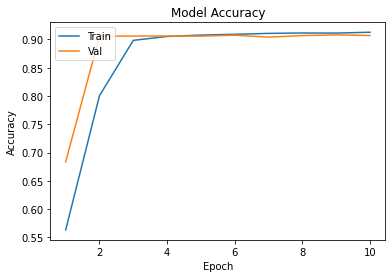

In [76]:
def plot_learningCurve(GenrePred, epoch):
# Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, GenrePred.history['binary_accuracy'])
  plt.plot(epoch_range, GenrePred.history['val_binary_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

plot_learningCurve(GenrePred, 10)

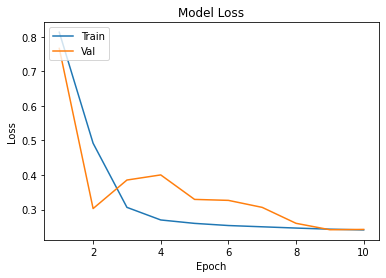

In [77]:
def plot_learningCurve(GenrePred, epoch):
# Plot training & validation loss values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, GenrePred.history['loss'])
  plt.plot(epoch_range, GenrePred.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

plot_learningCurve(GenrePred, 10)

## **Testing the Model on Some Movie Posters**

Drama
Comedy
Action


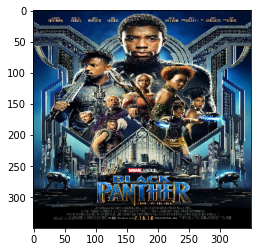

In [78]:
img1 = image.load_img('black-panther-web.jpg', target_size=(image_height, image_width, 3))
plt.imshow(img1)
img1 = image.img_to_array(img1)
img1 = img1/255.0

img1 = img1.reshape(-1, image_height, image_width, 3)

classes = Metadata.columns[2:]
y_prob1 = model.predict(img1)
top3_1 = np.argsort(y_prob1[0])[:-4:-1]

for i in range(3):
  print(classes[top3_1[i]])

Drama
Thriller
Crime


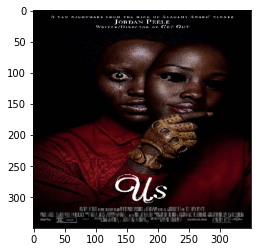

In [79]:
img2 = image.load_img('us-1.jpg', target_size=(image_height, image_width, 3))
plt.imshow(img2)
img2 = image.img_to_array(img2)
img2 = img2/255.0

img2 = img2.reshape(1, image_height, image_width, 3)

classes = Metadata.columns[2:]
y_prob_2 = model.predict(img2)
top3_2 = np.argsort(y_prob_2[0])[:-4:-1]

for i in range(3):
  print(classes[top3_2[i]])

Drama
Thriller
Action


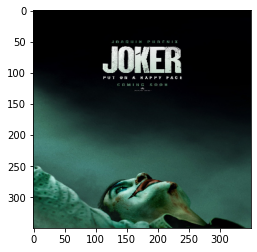

In [80]:
img3 = image.load_img('joker.jpg', target_size=(image_height, image_width, 3))
plt.imshow(img3)
img3 = image.img_to_array(img3)
img3 = img3/255.0

img3 = img3.reshape(1, image_height, image_width, 3)

classes = Metadata.columns[2:]
y_prob_3 = model.predict(img3)
top3_3 = np.argsort(y_prob_3[0])[:-4:-1]

for i in range(3):
  print(classes[top3_3[i]])

Drama
Comedy
Action


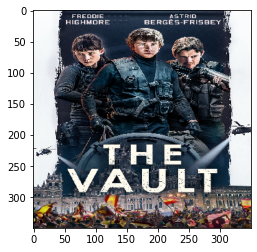

In [81]:
img4 = image.load_img('/content/MV5BZTliM2M5MjktZmY2NC00NjdlLWE5YzUtNDU2NzA0MzkyMDNlXkEyXkFqcGdeQXVyMTE1Nzg4NjY0._V1_.jpg', target_size=(image_height, image_width, 3))
plt.imshow(img4)
img4 = image.img_to_array(img4)
img4 = img4/255.0

img4 = img4.reshape(1, image_height, image_width, 3)

classes = Metadata.columns[2:]
y_prob = model.predict(img4)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

Drama
Action
Thriller


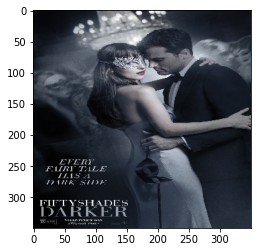

In [82]:
img5 = image.load_img('50Shades.jpg', target_size=(image_height, image_width, 3))
plt.imshow(img5)
img5 = image.img_to_array(img5)
img5 = img5/255.0

img5 = img5.reshape(1, image_height, image_width, 3)

classes = Metadata.columns[2:]
y_prob = model.predict(img5)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

Drama
Action
Comedy


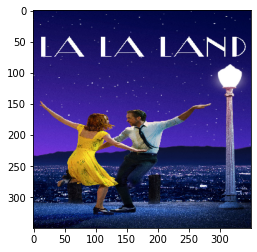

In [83]:
img6 = image.load_img('Lalaland.jpg', target_size=(image_height, image_width, 3))
plt.imshow(img6)
img6 = image.img_to_array(img6)
img6 = img6/255.0

img6 = img6.reshape(1, image_height, image_width, 3)

classes = Metadata.columns[2:]
y_prob_6 = model.predict(img6)
top3_6 = np.argsort(y_prob_6[0])[:-4:-1]

for i in range(3):
  print(classes[top3_6[i]])

In [ ]:
!pip install --quiet gradio

In [ ]:
import gradio as gr

In [ ]:
classes
labels = data.columns[2:].to_list()
labels

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'N/A',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [ ]:
#def classify_genre(img3D):
    #img3D = img3D.reshape((1, image_height, image_width, 3))
    #prediction = model.predict(img3D)[0]
    #return {classes[i]: float(prediction[i]) for i in range(25)}

   
#def classify_genre(img):
  #img = img.reshape(1, image_height, image_width, 3)
 # y_prob = model.predict(img)[0]
 # top3 = np.argsort(y_prob[0])[:-4:-1]
 # return {labels[top3[i]] : float(y_prob[i]) for i in range(25)}

In [ ]:
image = gr.inputs.Image(shape=(image_height,image_width))
label = gr.outputs.Label(num_top_classes=3)

gr.Interface(fn = classify_genre, inputs= image, outputs = label, capture_session=True, title= 'Movie  Genre Predition', interpretation="default").launch(debug = 'True');

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://13075.gradio.app
Interface loading below...


[2021-05-12 18:30:59,361] ERROR in app: Exception on /api/predict/ [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.7/dist-packages/flask_cors/extension.py", line 165, in wrapped_function
    return cors_after_request(app.make_response(f(*args, **kwargs)))
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/usr/local/lib/python3.7/dist-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1936, in dispatch_

KeyboardInterrupt: ignored